<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/Logo_INSAvilletoulouse-RVB.png" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Introduction à l'[AFD](http://wikistat.fr/pdf/st-m-explo-afd.pdf) avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
# Exemples élémentaires
#### Résumé 
Illustration par un exemple jouet puis analyse de données socio-économiques par [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf) et [Analyse Factorielle Discriminante](http://wikistat.fr/pdf/st-m-explo-afd.pdf) (AFD) avec R.

## 1 Introduction
Il y a différentes approches du problème de la discrimination selon les hypothèses admises et la méthodologie mise en oeuvre. Nous nous limitons ici à l'approche descriptive ou factorielle (décomposition en facteurs). L'approche décisionnelle est traité en saison 3. 

L'[Analyse Factorielle Discriminante](http://wikistat.fr/pdf/st-m-explo-afd.pdf) est un cas particulier d'[ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf) pour décrire la capacité de discriminations des classes d'UNE variable qualitative $Y$ par un ensemble de variables quantitatives $X^1,...,X^p$. 

**Q** Quelle est cette ACP?

Cette méthode encore appelée *canonical discriminant analysis* dans la littérature anglo-saxone est assez peu répandue et donc peu présente, voire absente, des logiciels ou librairies. Son usage est néanmoins détaillée pour insister sur le rôle spécifique de la métrique de *Mahalabobis* qui se retrouve dans d'autres circonstances: analyse discriminante décisionnelle, $k$ plus proches voisins, détection d'anomalies.

Sachant que l'AFD est une ACP, il suffirait de dérouler en R les calculs matriciels décrit dans  la [vignette](http://wikistat.fr/pdf/st-m-explo-afd.pdf) pour aboutir au résultat. Néanmoins le choix est fait d'utiliser les ressources déjà présentes de la fonction `lda` de R.

## 2 Exemple jouet: les iris de Fisher
Il s'agit d'un jeu de données historique le plus utilisé pour illustrer toute méthode exploratoire, inférentielle ou prédictive. 
### 2.1 Description élémentaire
Les données sont bien connues de R et décrivent 3 type d'iris par les longueurs et largeurs de leurs pétales et sépales.

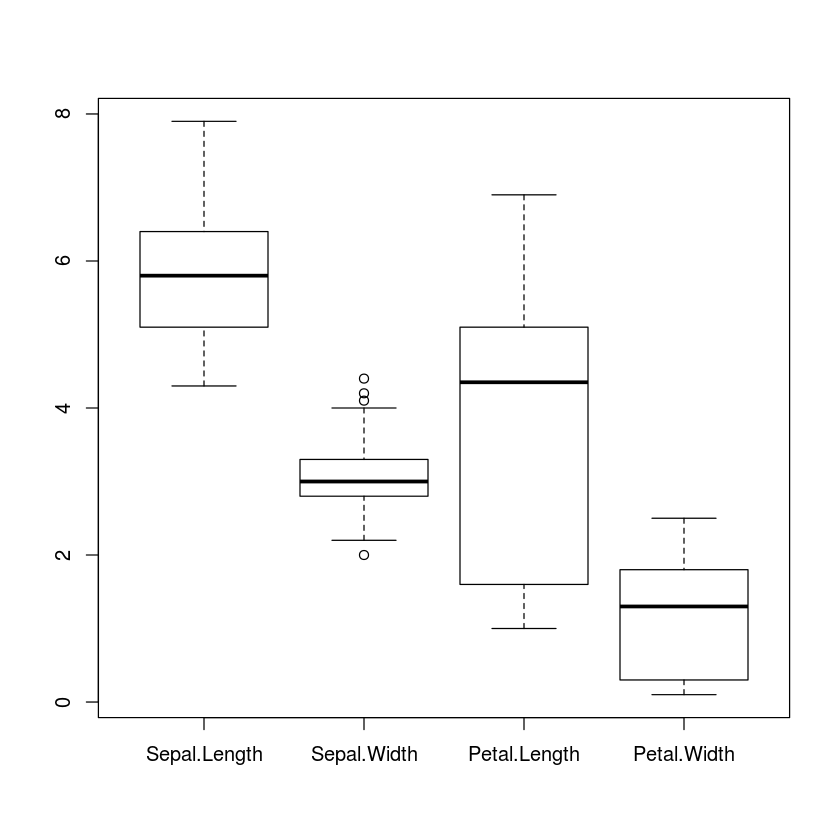

In [1]:
boxplot(iris[,1:4])

In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

**Q** Quel est le graphique ci-dessous? Que dire de la séparation des classes?
graphe des   ..........La séparation des espèces n'est pas nette! car on a des zones de superposition des espèces croise chak var avec un coupl de variable=> scaterplot matrix matrice de nuage de points

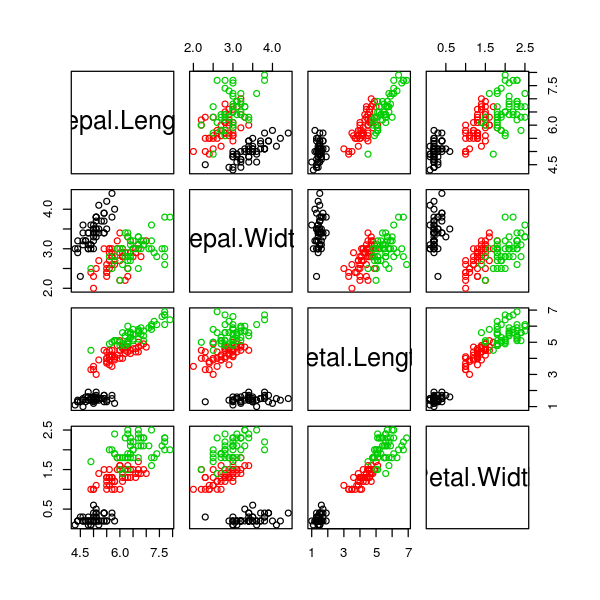

In [3]:
options(repr.plot.width=5, repr.plot.height=5)
pairs(iris[,1:4],col=iris$Species)

### 2.2 ACP des iris

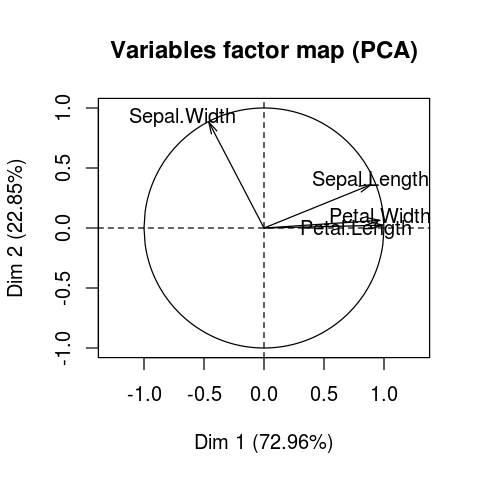

In [4]:
library(FactoMineR)
acp=PCA(iris[,1:4], graph=F)
options(repr.plot.width=4, repr.plot.height=4)
plot(acp,choix="var")

**Q** Interprétation des axes.
premier axe= moyenne des longueurs et largeurs des pétales et sépales de toutes les espèces
           =taille générale des fleurs
### A RETENIR: 3 var corrélées (cf cosinus angle)avec le premier axe=> explication de l'axe 1
deuxieme axe= largeur des sépales!!!
### A RETENIR: 1 seule var correlée avec le deuxième axe=> explication de l'axe 2

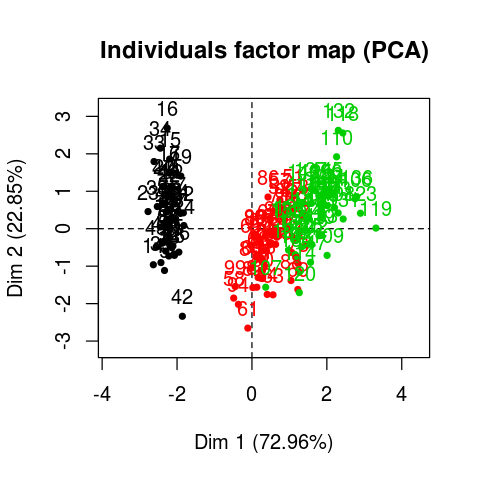

In [6]:
plot(acp, choix="ind", habillage="ind",col.hab=iris$Species)

**Q** Que dire de la séparation naturelle des classes?
Séparation naturelle des classes => une classe bien dissociée des autres et 2 autres encore sans séparation nette , visible!

**Q** Que dire de la forme des nuages et donc de la structure de covariance intra-classe?
Pour les espèces représentés en rouge et vert: Même forme des nuages allongés dans le même sens =>même structure de covar intra-classe= matrice des covariances semblables d'une classe à l'autre
### 2.3 AFD des iris

In [7]:
library(MASS)
# calcul de l'afd
afd=lda(iris[,1:4],iris$Species)
print(afd)

Call:
lda(iris[, 1:4], iris$Species)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776  0.02410215
Sepal.Width   1.5344731  2.16452123
Petal.Length -2.2012117 -0.93192121
Petal.Width  -2.8104603  2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 


**Q** Commenter ces résultats. 
group means= barycentre de chaque espèce par variable
coef of linear discriminants= vecteur propres
**Q** Quelle est la dimension de l'espace de représentation?
on centre les 3 barycentres et donc on perd un axe et on se retrouve avec une dimension de l'espace de représentation =2 car(LD1 et LD2 =variances de la premier et deuxième composante)

Un graphique est aussi proposé mais incomplet:

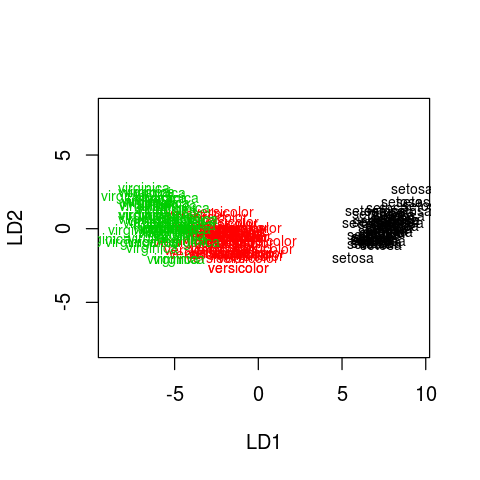

In [8]:
plot(afd, col=as.integer(iris$Species))

**Q** Que manque-t-il dans ce graphique?
il manque les variables

**Q** Que dire de la forme des nuages en relation avec le choix de la métrique?

Pour les espèces représentés en rouge et vert: Même forme des nuages allongés dans le même sens =>même structure de covar intra-classe= matrice des covariances semblables d'une classe à l'autre

Calcul des coordonnées des barycentres des classes dans le nouveau repère.

In [12]:
pred=predict(afd,data=iris[,1:4])

m=matrix(rep(0,6),nrow=3,ncol=2)
for (i in 1:3){
 for (j in 1:2){m[i,j]=mean(pred$x[unclass(iris$Species)==i,j])}}


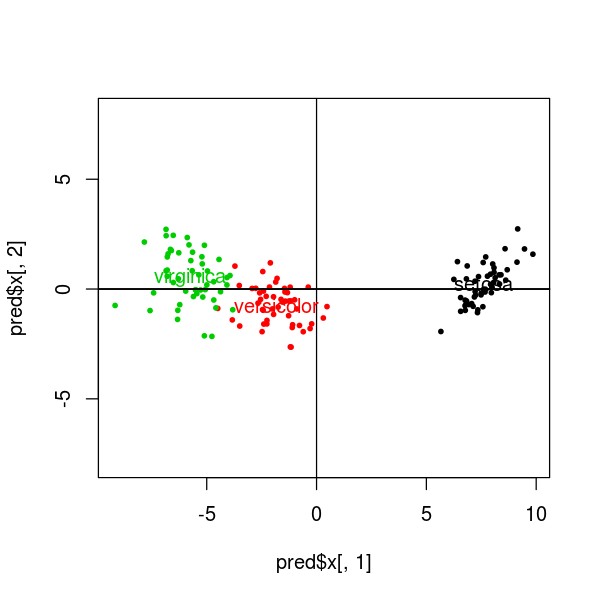

In [21]:
# graphe dans le premier plan
color=as.integer(iris$Species)
options(repr.plot.width=5, repr.plot.height=5)
plot(pred$x[,1],pred$x[,2],type="p",col=color,pch=19,cex=0.5,asp=1)
abline(0,0,h=0); abline(0,0,v=0)
text(m[,1],m[,2],labels=levels(iris$Species),cex=1,col=1:3)

**Q** Que dire de la forme des nuages autour des barycentres? Remarquer le rôle important du paramètre `asp=1`.
calcul des coord des points données par predict 
puis coord des barycentres de ces points 
ensuite la moyenne des points pour calculer les barycentres des classes

`asp=1` permet de dessiner des nuages sphériques autour du barycentre  des classes

**Q** Que dire des capacités de discrimination des variables?
bonne capacité de discrmination des classes! même si la frontière entre les espèces rouge et verte n'est pas encore nette

## 3 Données socio-économiques départementales *vs.* régionales
Cette section se focalise sur l'exploration de données socio-économiques observées sur les différents départements regroupés en régions administratives. La question posée est: les régions définies géographiquement sont elles relativement homogènes sur ces aspects socio-économiques. Ce peut être une analyse éclairante de la volonté de supprimer les départements et regrouper des régions. On répond à cette question de façon indirecte et exploratoire, en cherchant à savoir si les variables socio-économiques permettent de discriminer les régions.


### 3.1 Les données
Les données proviennent du Groupe d'Étude et de Réflexion Inter-régional (GERI). Elles décrivent, quatre grands thèmes~: la démographie, l'emploi, la fiscalité directe locale, la criminalité, de chacun des départements français métropolitains et la Corse. Les indicateurs ont été observés pendant l'année 1990, ils sont, pour la plupart, des taux calculés relativement à la population totale du département concerné. Voici leur liste:
- identificateur: numéro du département,
- identificateur: code du département,
- identificateur: code de la région, 
- URBR: indicateur de concentration de la population mesurant le caractère urbain ou rural d'un département,
- TXCR: taux de croissance de la population sur la période intercensitaire 1982-1990,
- JEUN: part des 0-19 ans dans la population totale, 
- AGE: part des plus de 65 ans dans la population totale,
- FE90: taux de fécondité (pour 1000) égal au nombre de naissances rapportés au nombre de femmes fécondes (15 à 49 ans) en moyenne triennale, 
- ETRA: part des étrangers dans la population totale, 
- CHOM: taux de chômage, 
- CRIM: taux de criminalité~: nombre de délits par habitant,
- FISC: produit, en francs constants 1990 et par habitant des quatre taxes directes locales (professionnelle, habitation, foncier bâti, foncier non bâti).

Parts de chaque profession et catégorie socioprofessionnelle (PCS) dans la population active occupée du département:
- AGRI: agriculteurs,
- ARTI: artisans, 
- CADR: cadres supérieurs, 
- EMPL: employés, 
- OUVR: ouvriers, 
- PROF: professions intermédiaires. 

En plus de ces variables, la première colonne identifie le département, la deuxième sa région avant le regorupement, la dernière une proposition de regroupement géographique en 6 frandes régions différentes de celles récemment choisies.

Une première étape descriptive n'a pas conduit à des re-transformations des variables. 

**Q** Celles-ci sont, pour la plupart, déjà des taux, pourquoi?. 
car on a besoin de comparer les structures des départements pour pouvoir les comparer entre eux et pas comparer les tailles des départements

**Q** dan le même ordre d'idée, les départements d'Ile de France sont exclus. Pourquoi? TROP urbanisé
et TROP différents du reste des départements(STRUCTURE)


Une ACP permet de se faire une première idée sur l'organisation de ces données. 

## 3.2 Analyse en composantes principales

In [22]:
depart=read.csv("Data/depart.csv",row.names=1)
summary(depart)

     depart       region        txcr             etra              urbr       
 Ad     : 2   MiP    : 8   Min.   :-5.730   Min.   :0.00600   Min.   :0.0000  
 SH     : 2   RhA    : 8   1st Qu.: 0.330   1st Qu.:0.02650   1st Qu.:0.2595  
 2S     : 1   Cen    : 6   Median : 2.620   Median :0.04300   Median :0.3770  
 Ab     : 1   PAC    : 6   Mean   : 3.409   Mean   :0.04451   Mean   :0.3946  
 Ag     : 1   Aqu    : 5   3rd Qu.: 5.660   3rd Qu.:0.05950   3rd Qu.:0.5115  
 AH     : 1   LaR    : 5   Max.   :15.090   Max.   :0.09900   Max.   :0.9450  
 (Other):79   (Other):49                                                      
      jeun             age              chom             agri        
 Min.   :0.1980   Min.   :0.1100   Min.   :0.0630   Min.   :0.01200  
 1st Qu.:0.2380   1st Qu.:0.1415   1st Qu.:0.0995   1st Qu.:0.04250  
 Median :0.2610   Median :0.1620   Median :0.1110   Median :0.06800  
 Mean   :0.2578   Mean   :0.1676   Mean   :0.1130   Mean   :0.07595  
 3rd Qu.:0.2770   

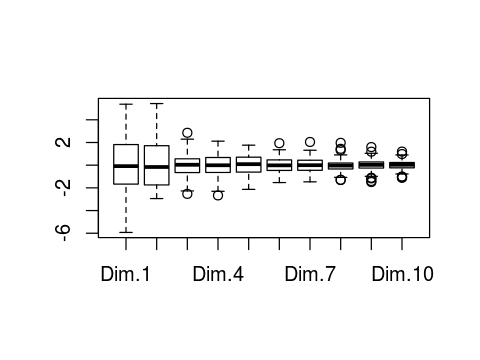

In [23]:
acp=PCA(depart[,3:17],graph=F,ncp=10)
options(repr.plot.width=4, repr.plot.height=3)
boxplot(acp$ind$coord)

**Q** Quelle dimension retenir?
2!!!!!

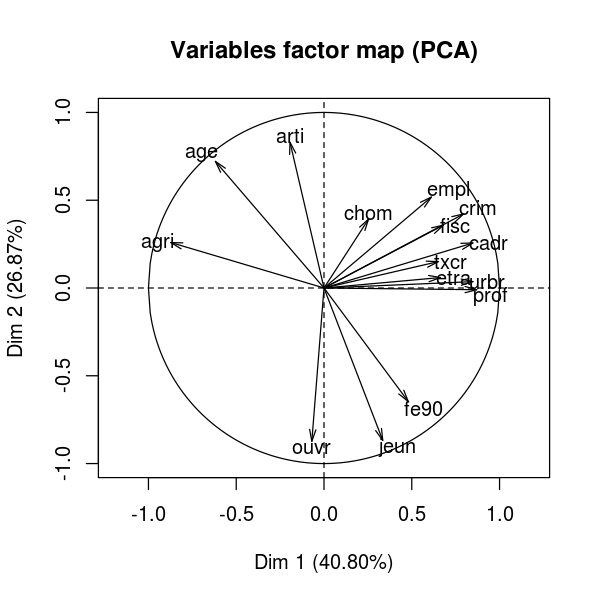

In [24]:
options(repr.plot.width=5, repr.plot.height=5)
plot(acp,choix="var")

**Q** Interpré&tation des axes?

axe1=urbanisation

axe2=l'age de population des département

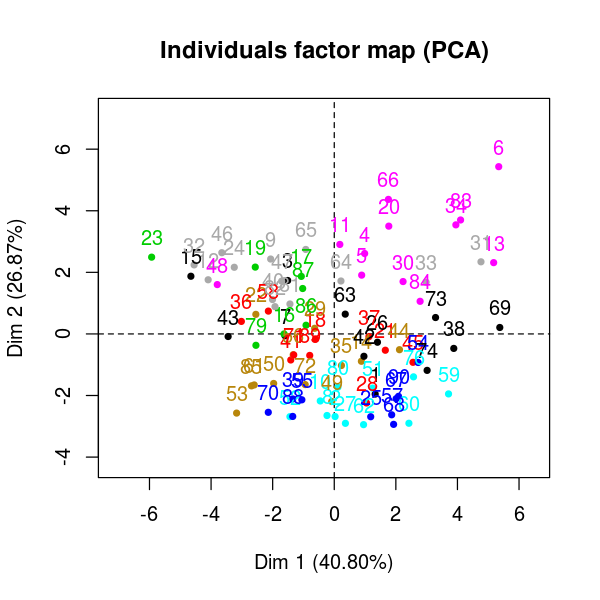

In [25]:
plot(acp, choix="ind", habillage="ind",col.hab=depart$groupreg)

**Q** Homogénéité des classes?

Non, les classes ne sont pas homogènes!!
surtout les points noirs, qui sont très dispersés

## 3.3 Analyse factorielle discriminante
On se propose de mettre en évidence les plus grandes disparités inter-régionales et donc de rechercher les variables ou combinaisons de variables expliquant au mieux le découpage régional. Autre question: les régions administratives sont-elle homogènes d'un point de vue socio-économique. Pour simplifier, nous procédons à des regroupements afin de construire des régions moins nombreuses comprenant des nombres de départements plus semblables. La région Ile de France, trop particulière et donc trop facile à discriminer, a été laissée à part. 

In [26]:
library(MASS)
# calcul de l'afd
dep.afd=lda(depart[,3:17],depart$groupreg)
print(dep.afd)

Call:
lda(depart[, 3:17], depart$groupreg)

Prior probabilities of groups:
        CE         CN         CW         Es         Nd         SE         SW 
0.13793103 0.11494253 0.08045977 0.11494253 0.12643678 0.13793103 0.14942529 
        Ws 
0.13793103 

Group means:
          txcr       etra      urbr      jeun       age      chom       agri
CE  4.60666667 0.06008333 0.4615833 0.2593333 0.1564167 0.0997500 0.06816667
CN  3.03300000 0.04690000 0.3732000 0.2570000 0.1745000 0.1020000 0.06270000
CW -0.01428571 0.02042857 0.3065714 0.2345714 0.1992857 0.1130000 0.11157143
Es  0.97700000 0.06340000 0.4219000 0.2738000 0.1403000 0.0991000 0.04010000
Nd  2.39000000 0.04136364 0.4509091 0.2909091 0.1353636 0.1265455 0.04927273
SE  7.92583333 0.06433333 0.4683333 0.2379167 0.1854167 0.1416667 0.06016667
SW  2.97307692 0.04030769 0.3291538 0.2293846 0.1976923 0.1133846 0.11507692
Ws  3.43583333 0.01283333 0.3199167 0.2775833 0.1561667 0.1055833 0.10175000
         arti       cadr      empl    

Comme précédemmnent, le graphique inclus est peu adapté, il est préférable de construire à la main le plan factoriel

In [27]:
# calcul des coordonnées barycentres
dep.pred=predict(dep.afd,data=depart[,3:17])
m=matrix(rep(0,16),nrow=8,ncol=2)
for (i in 1:8){
 for (j in 1:2){
 m[i,j]=mean(dep.pred$x[unclass(depart$groupreg)==i,j])}}

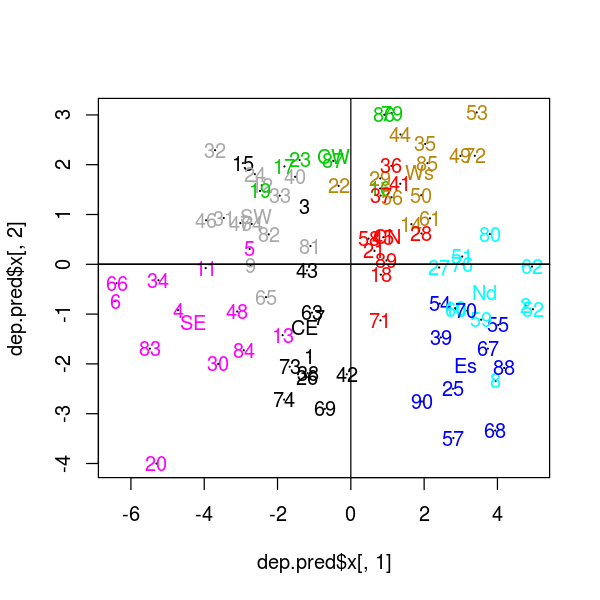

In [28]:
# graphe dans les axes 1 et 2
color=as.integer(depart$groupreg)
plot(dep.pred$x[,1],dep.pred$x[,2],cex=0.001)
text(dep.pred$x[,1],dep.pred$x[,2],labels=row.names(depart),col=color)
abline(0,0,h=0); abline(0,0,v=0)
text(m[,1],m[,2],labels=levels(depart$groupreg),cex=1,col=1:8)

**Q** Quelles sont les régions géographiques économiquement homogènes? Proches? 
ES WS S
et CN...... CE SE et SW

**Q** Quelle est la région la plus disparate.
CE